<a href="https://colab.research.google.com/github/tamburins/ESAA_2023/blob/main/Hotel_EDA_week2_%EB%AF%BC%EC%9E%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

1) 1등먹은 사람의 인사이트 공유
- 목적: 취소현황 예측하기
- 피처 분포도가 유사하나 원본 데이터와 백퍼센트 유사하진 않음
- 원본 데이터는 차이를 탐색하고 모델 성능을 향상시키는데 사용될 수 있음


2) 변수 설명
- input variable:
id: unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of 
weekend nights (Saturday or Sunday) 
the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
type_of_meal_plan: Type of meal plan 

booked by the customer:

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a 

repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price 
per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

- Output variable:

booking_status (0 or 1)

## 데이터 불러오고 톺아보기

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/ESAA/OB/호텔EDA/Hotel Reservations.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## object로 되어있는 type_of_meal_plan,room_type_reserved, market_segment_type, BOOKING_STATUS 확인 및 처리

### type_of_meal_plan

In [ ]:
data.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [ ]:
data['type_of_meal_plan'] = data['type_of_meal_plan'].map({'Meal Plan 1':1, 'Not Selected':0,'Meal Plan 2':2, 'Meal Plan 3':3 })

In [ ]:
data.type_of_meal_plan.value_counts()

1    27835
0     5130
2     3305
3        5
Name: type_of_meal_plan, dtype: int64

### room_type_reserved



In [ ]:
data.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [ ]:
data['room_type_reserved'] = data['room_type_reserved'].map({'Room_Type 1':1, 'Room_Type 2':2, 'Room_Type 3':3, 'Room_Type 4':4, 'Room_Type 5':5, 'Room_Type 6':6, 'Room_Type 7':7 })

In [ ]:
data.room_type_reserved.value_counts()

1    28130
4     6057
6      966
2      692
5      265
7      158
3        7
Name: room_type_reserved, dtype: int64

### market_segment_type

In [ ]:
data.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [ ]:
data['market_segment_type'] = data['market_segment_type'].map({'Online':1, 'Offline':2, 'Corporate':3, 'Complementary':4, 'Aviation':5})

In [ ]:
data.market_segment_type.value_counts()

1    23214
2    10528
3     2017
4      391
5      125
Name: market_segment_type, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  int64  
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  int64  
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### BOOKINGSTATUS

In [ ]:
data.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [ ]:
data['booking_status'] = data['booking_status'].map({'Not_Canceled':0, 'Canceled':1})

In [ ]:
data.booking_status.value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  int64  
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  int64  
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1


### 아이디는 필요없을 것 같아 별도 저장후 지움


In [ ]:
data_ID = data['Booking_ID']
data.drop(columns='Booking_ID', inplace=True)
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,2018,8,3,1,0,0,0,167.80,1,0
36271,2,0,1,3,1,0,1,228,2018,10,17,1,0,0,0,90.95,2,1
36272,2,0,2,6,1,0,1,148,2018,7,1,1,0,0,0,98.39,2,0
36273,2,0,0,3,0,0,1,63,2018,4,21,1,0,0,0,94.50,0,1


## 데이터 결측치 및 이상치 확인
### 데이터 결측치 확인

In [ ]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
# NULL값 없음, 최대최솟값을 통해 큰 범위 내에서 이상치 확인
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.949966,0.030986,1.708890,85.232557,2017.820427,7.423653,15.596995,1.447553,0.025637,0.023349,0.153411,103.423539,0.619655,0.327636
std,0.518715,0.402648,0.870644,1.410905,0.480191,0.173281,1.399851,85.930817,0.383836,3.069894,8.740447,0.681536,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2017.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,17.000000,2018.000000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,1.000000,0.000000,1.000000,126.000000,2018.000000,10.000000,23.000000,2.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,7.000000,443.000000,2018.000000,12.000000,31.000000,5.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


## 이상치 확인

In [ ]:
import matplotlib.pyplot as plt

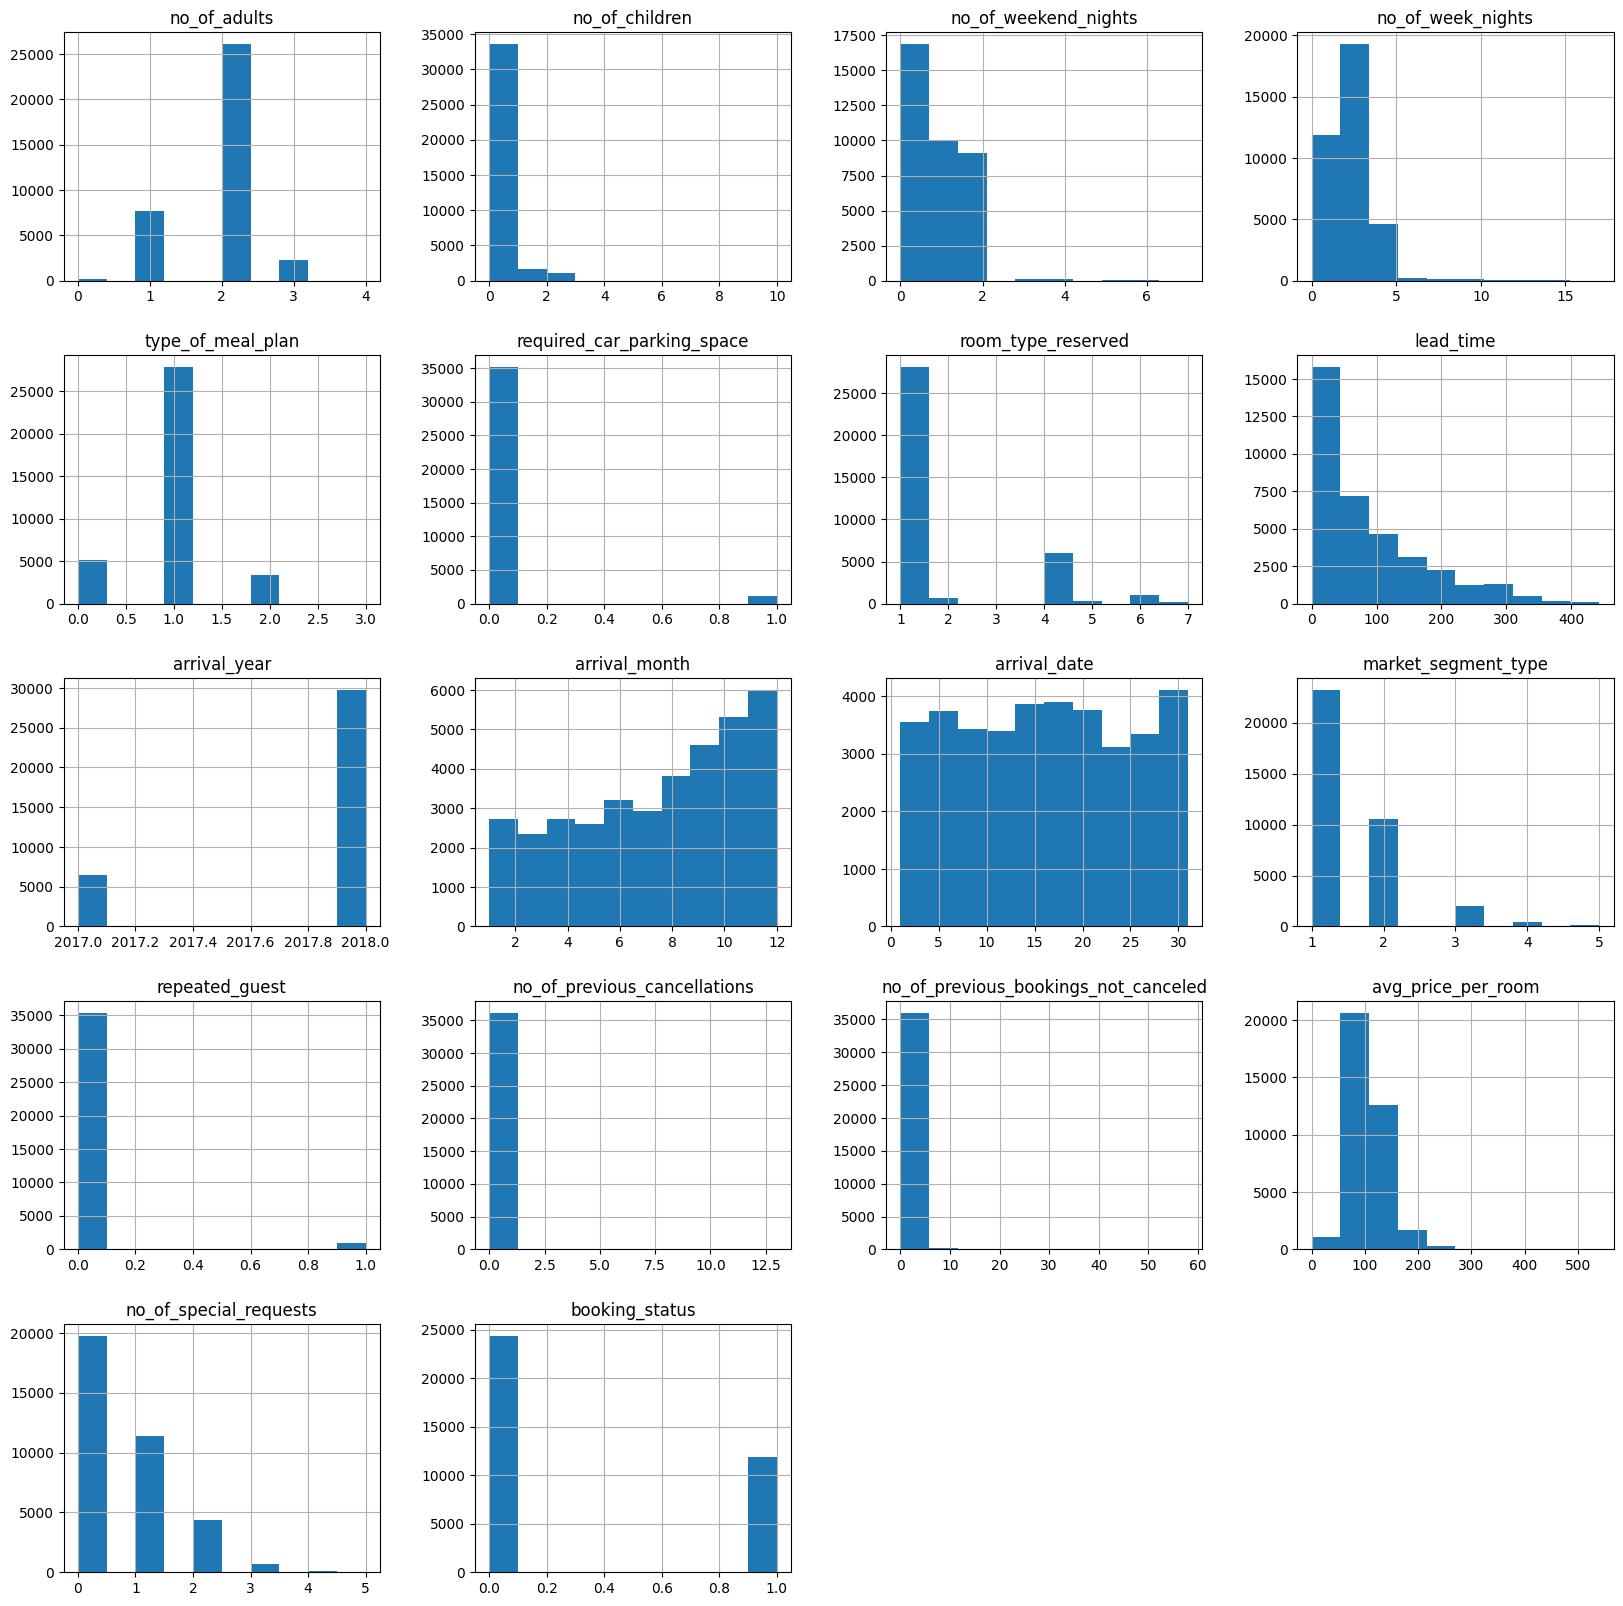

In [ ]:
# histogram으로 전체확인
data.hist(figsize=(20, 20))
plt.show()

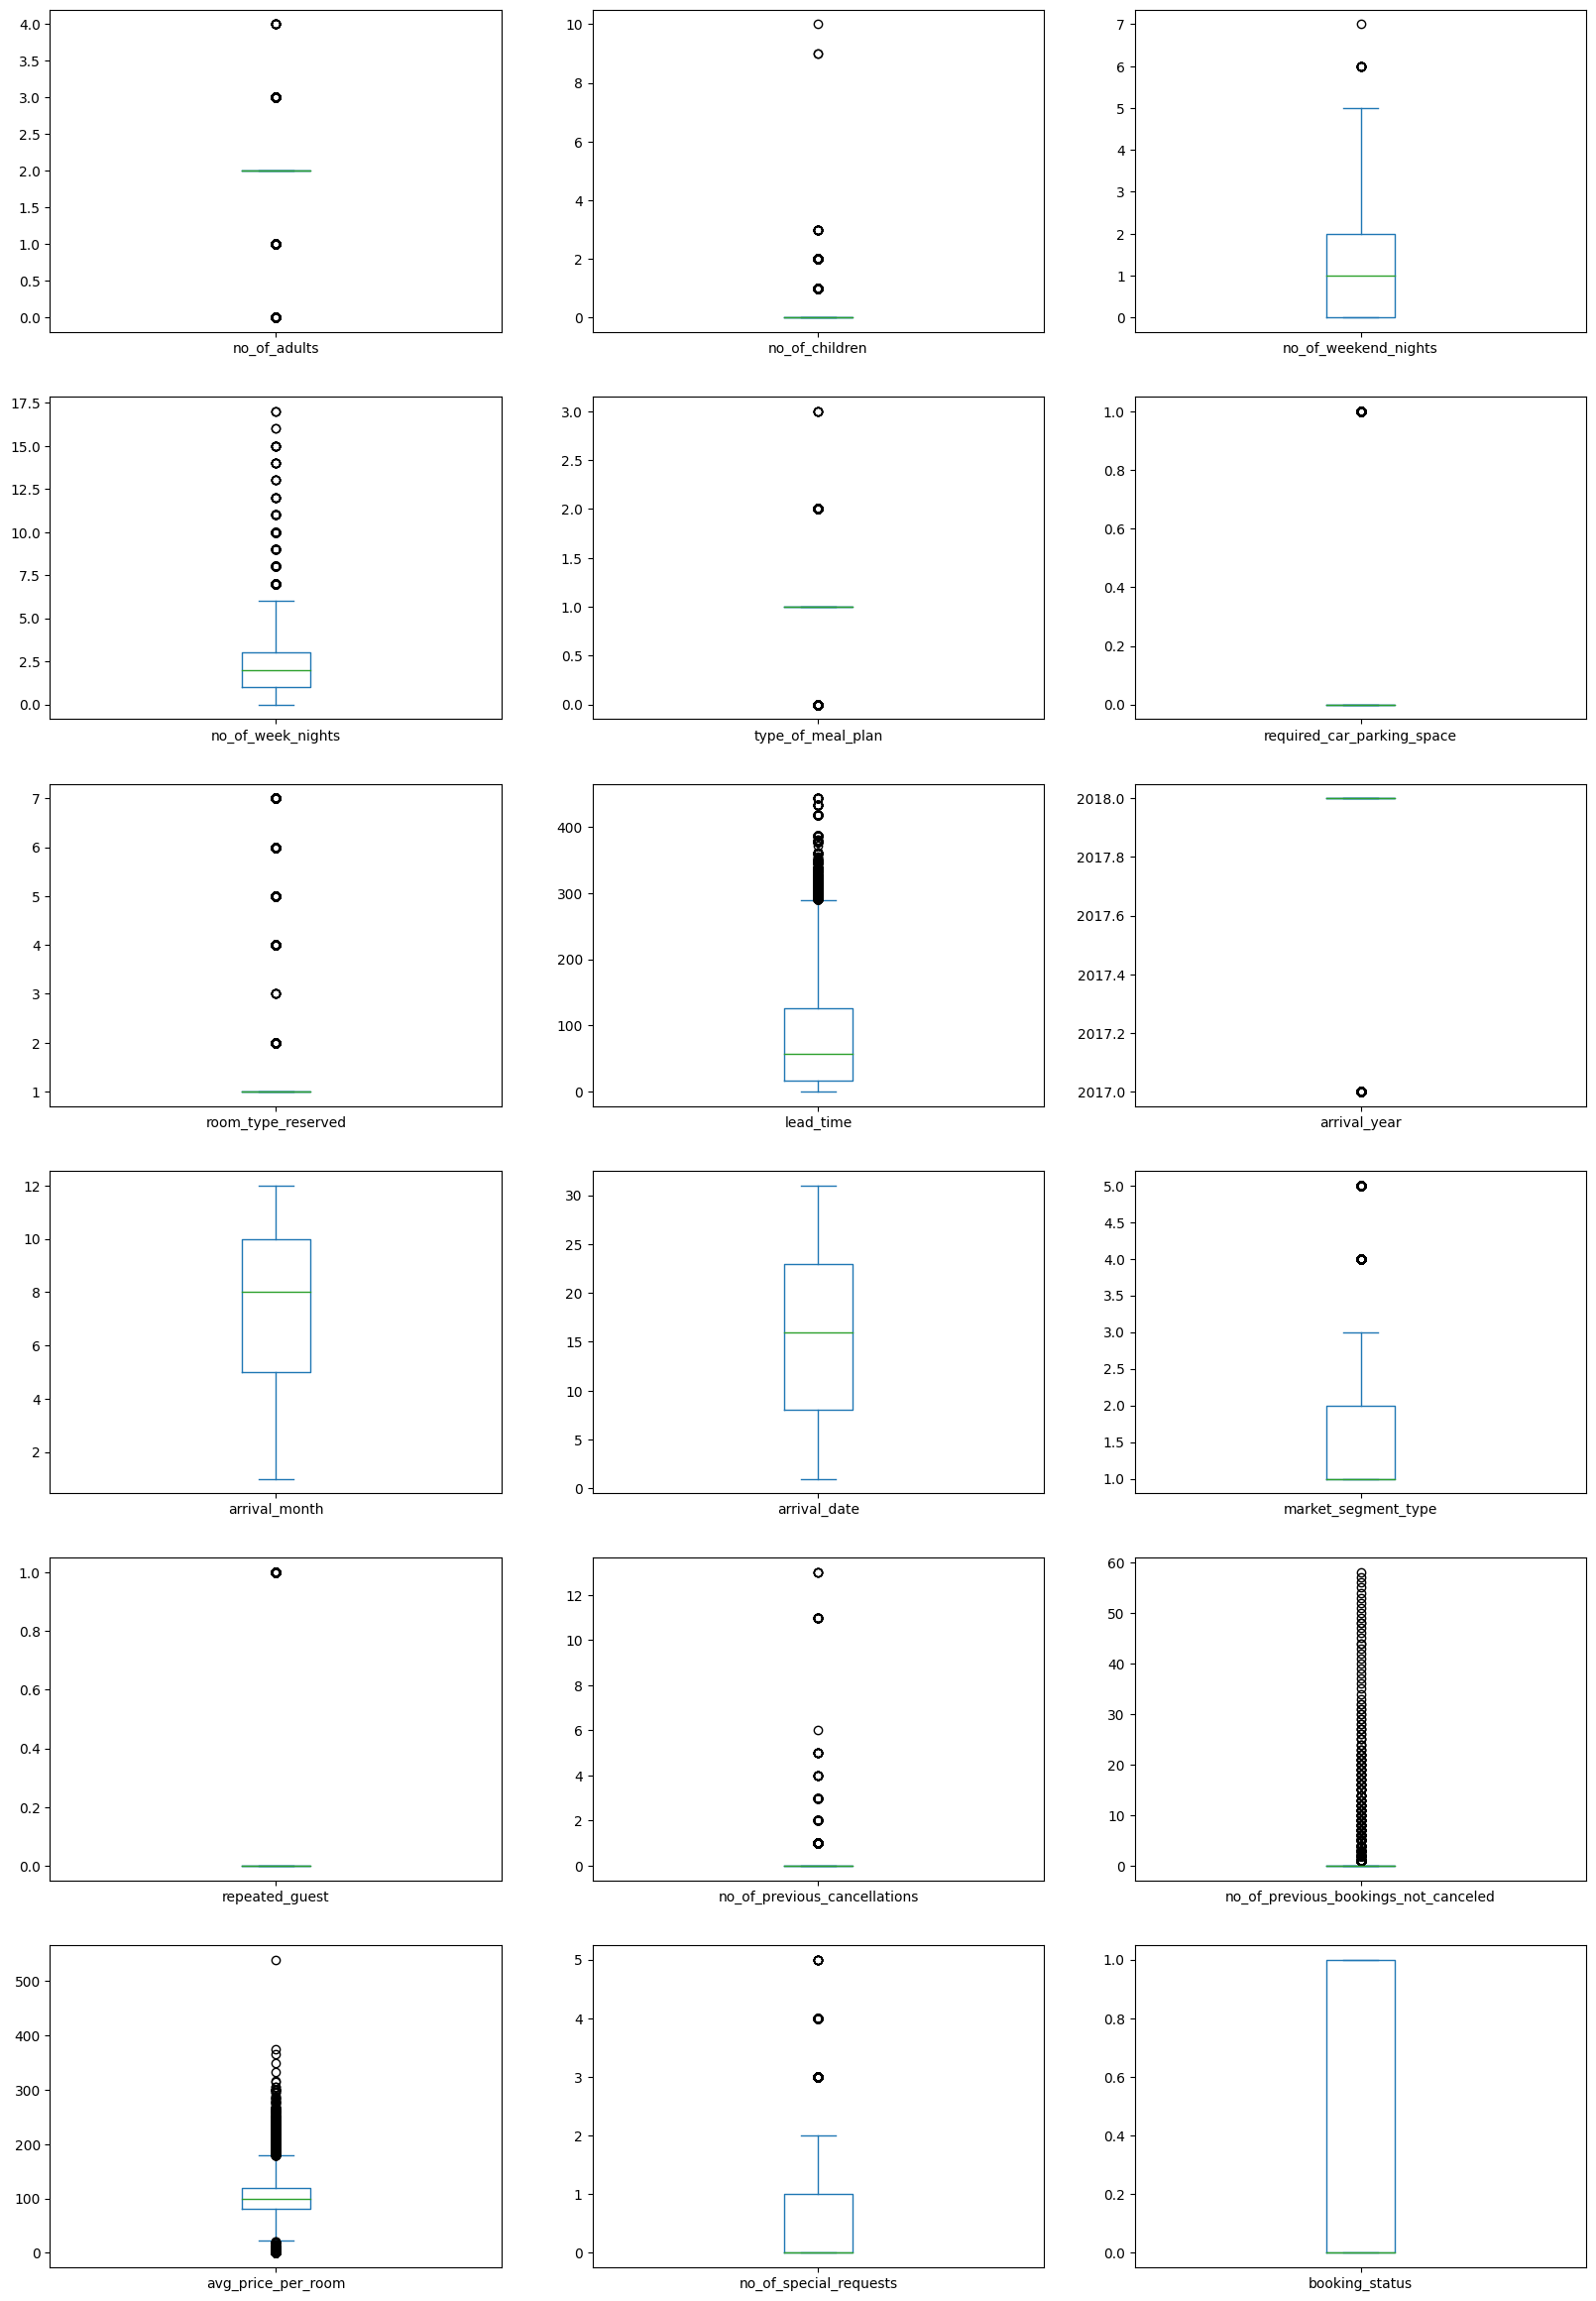

In [ ]:
data.plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, figsize=(20, 60))
plt.show()

In [ ]:
# 일단 continuous 범주만 분류해보자
continuous_feature = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights', 
                      'lead_time','no_of_previous_cancellations',
'no_of_previous_bookings_not_canceled','avg_price_per_room',
'no_of_special_requests']


<ipython-input-26-9aa65ce9ddfc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col].notnull(), col])


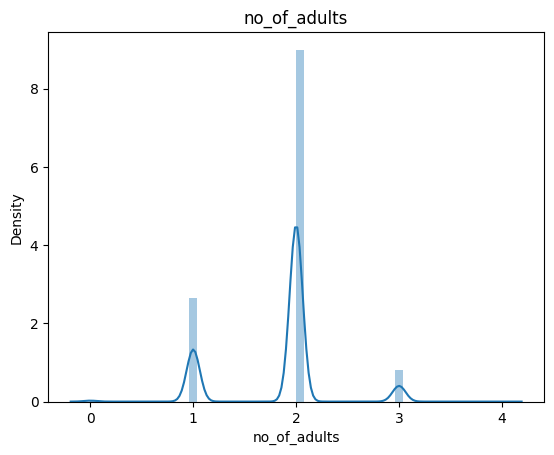

<ipython-input-26-9aa65ce9ddfc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col].notnull(), col])


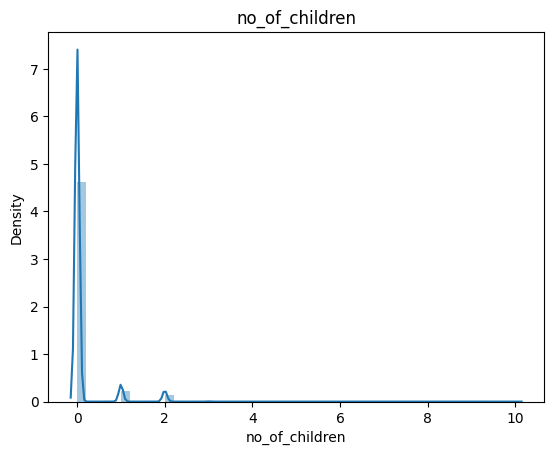

<ipython-input-26-9aa65ce9ddfc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col].notnull(), col])


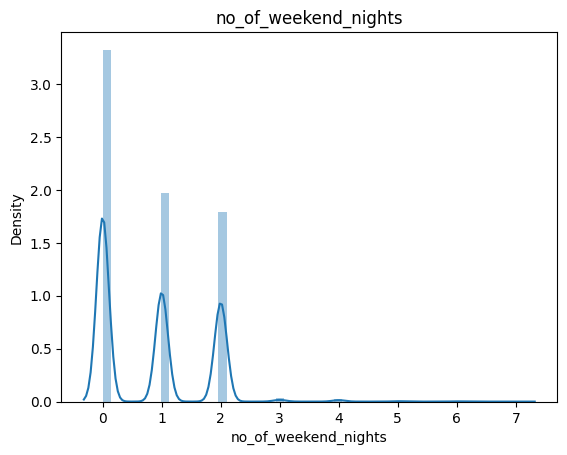

<ipython-input-26-9aa65ce9ddfc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col].notnull(), col])


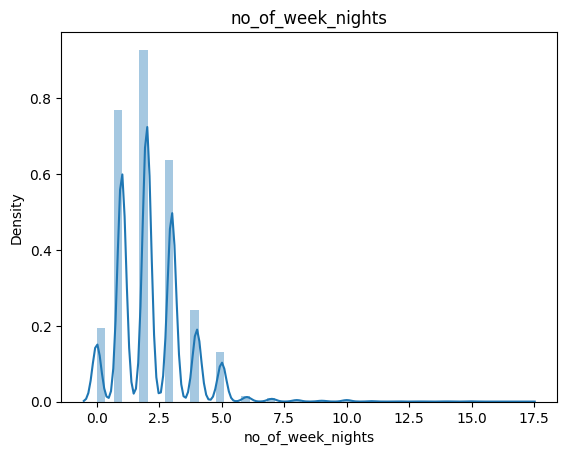

<ipython-input-26-9aa65ce9ddfc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col].notnull(), col])


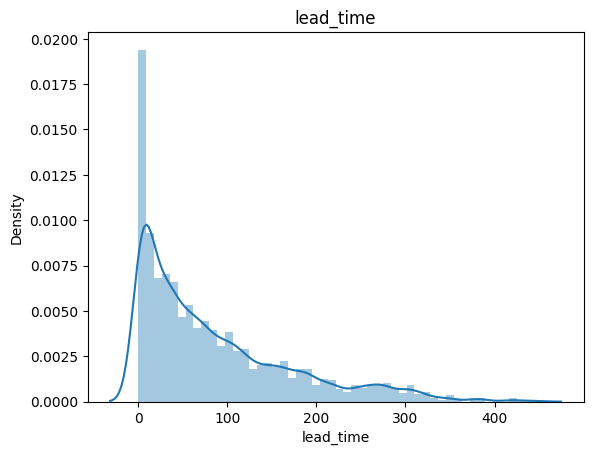

<ipython-input-26-9aa65ce9ddfc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col].notnull(), col])


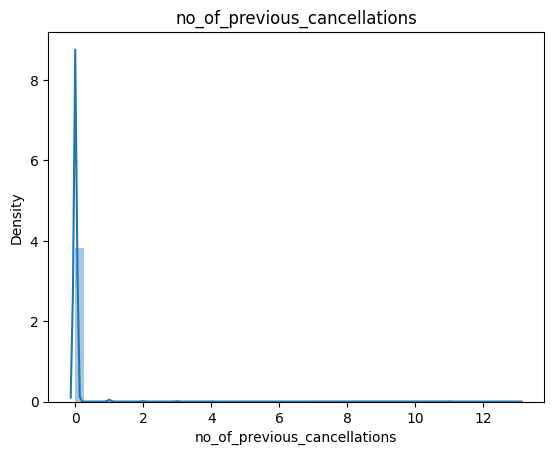

<ipython-input-26-9aa65ce9ddfc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col].notnull(), col])


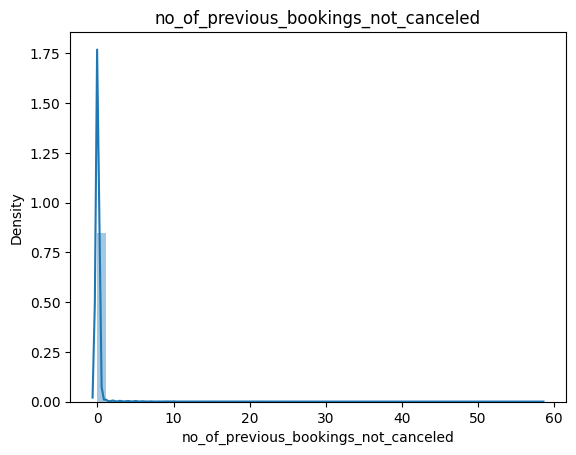

<ipython-input-26-9aa65ce9ddfc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col].notnull(), col])


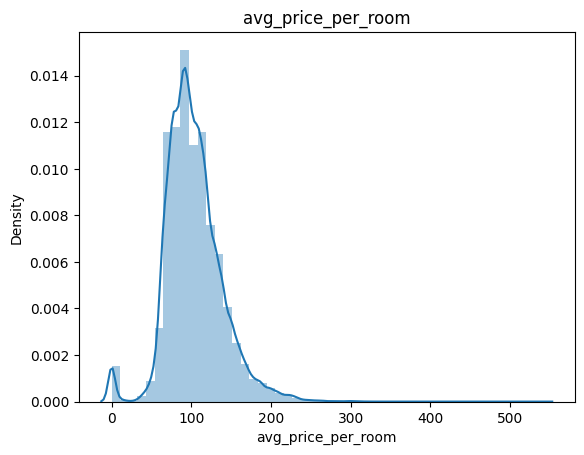

<ipython-input-26-9aa65ce9ddfc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data[col].notnull(), col])


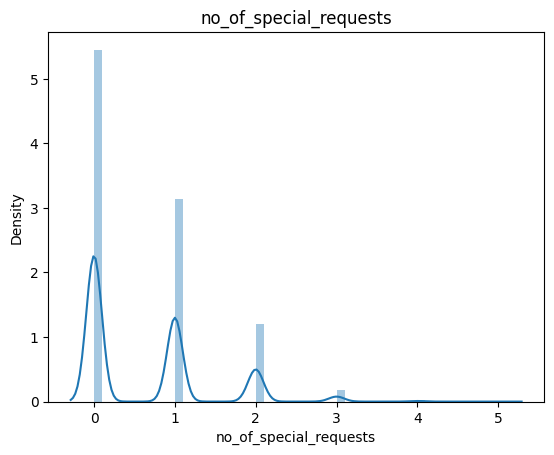

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in continuous_feature:
    sns.distplot(data.loc[data[col].notnull(), col])
    plt.title(col)
    plt.show()


### 날짜 합친 애

In [ ]:
temp = data.rename(columns={
    'arrival_year': 'year',
    'arrival_month': 'month',
    'arrival_date': 'day'
}).copy()

data['date'] = pd.to_datetime(temp[['year', 'month', 'day']], errors='coerce')

In [ ]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date
0,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00,0,0,2017-10-02
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0,2018-11-06
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1,2018-02-28
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1,2018-05-20
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1,2018-04-11


In [ ]:
# 이상치탐지함수(긁어옴)
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q75 = np.quantile(data[column], 0.75)          
  
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data2 = data[data[column] > q75]    
    
    # 이상치 총 개수 구하기
    return print('변수명은', column,'이고 q75값은',q75, '총 이상치 개수는', data2.shape[0], '이다.')
    


In [ ]:
for i in continuous_feature:
  outlier_iqr(data, i)

변수명은 no_of_adults 이고 q75값은 2.0 총 이상치 개수는 2333 이다.
변수명은 no_of_children 이고 q75값은 0.0 총 이상치 개수는 2698 이다.
변수명은 no_of_weekend_nights 이고 q75값은 2.0 총 이상치 개수는 337 이다.
변수명은 no_of_week_nights 이고 q75값은 3.0 총 이상치 개수는 5117 이다.
변수명은 lead_time 이고 q75값은 126.0 총 이상치 개수는 9058 이다.
변수명은 no_of_previous_cancellations 이고 q75값은 0.0 총 이상치 개수는 338 이다.
변수명은 no_of_previous_bookings_not_canceled 이고 q75값은 0.0 총 이상치 개수는 812 이다.
변수명은 avg_price_per_room 이고 q75값은 120.0 총 이상치 개수는 9058 이다.
변수명은 no_of_special_requests 이고 q75값은 1.0 총 이상치 개수는 5125 이다.


### no_of_adults가 0인 곳을 확인해보자

In [ ]:
data[(data['no_of_adults']==0)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date
32,0,2,0,3,1,0,2,56,2018,12,7,1,0,0,0,82.44,1,0,2018-12-07
287,0,2,2,2,1,0,1,68,2018,4,24,1,0,0,0,108.38,1,1,2018-04-24
653,0,2,1,2,1,0,2,78,2018,8,19,1,0,0,0,115.68,1,0,2018-08-19
937,0,2,0,3,1,0,2,40,2018,1,14,1,0,0,0,6.67,1,0,2018-01-14
954,0,2,1,1,1,0,2,92,2018,10,29,1,0,0,0,81.50,2,0,2018-10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34720,0,2,0,3,1,0,2,76,2018,9,21,1,0,0,0,127.38,3,0,2018-09-21
34730,0,2,1,1,1,0,2,178,2018,8,27,1,0,0,0,88.77,0,1,2018-08-27
34890,0,2,2,2,1,0,2,31,2018,9,16,1,0,0,0,124.25,2,0,2018-09-16
35691,0,2,2,1,1,0,2,75,2018,3,19,1,0,0,0,78.00,0,1,2018-03-19


In [ ]:
data[(data['no_of_adults']==0)&(data['no_of_children']==0)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date


### no_of_children 75퍼센트까지가 0명인데 갑자기 맥스가 10으로 치솟음. 확인해볼 필요가 있다

In [ ]:
pd.set_option('display.max_columns', None)
data[(data['no_of_children']>=5)]
# 걍 애들을 많이 데려온 걸로....

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date
6338,2,10,0,2,1,0,4,37,2018,1,12,1,0,0,0,84.45,1,0,2018-01-12
10041,1,9,2,1,1,0,1,11,2017,10,11,3,0,0,0,95.00,0,0,2017-10-11
10061,2,9,2,5,1,0,2,8,2017,8,13,1,0,0,0,76.50,1,1,2017-08-13


### no_of_weekend와 nights의 이상한 애들 있나 확인(주말이 2일 초과인데 week이 5 아래라든가... )

In [ ]:
data[(data['no_of_weekend_nights']>2)&(data['no_of_week_nights']<5)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date


In [ ]:
data[(data['no_of_weekend_nights']>2)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date
194,2,0,4,10,1,0,4,147,2018,8,3,1,0,0,0,118.88,1,1,2018-08-03
380,2,0,4,11,1,0,4,237,2018,9,13,1,0,0,0,116.62,1,1,2018-09-13
448,2,0,3,5,1,0,4,5,2018,4,4,1,0,0,0,126.75,0,1,2018-04-04
477,2,0,3,7,0,0,1,217,2018,12,5,1,0,0,0,46.63,1,0,2018-12-05
539,1,0,6,15,1,0,4,12,2018,3,30,1,0,0,0,128.06,0,1,2018-03-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35737,2,0,3,7,1,0,1,259,2018,8,22,1,0,0,0,65.49,0,1,2018-08-22
35778,3,0,4,10,1,0,4,73,2018,7,2,1,0,0,0,145.93,0,1,2018-07-02
35784,2,0,4,8,1,0,4,5,2018,2,12,1,0,0,0,106.83,0,1,2018-02-12
35904,2,2,4,10,1,0,6,43,2018,3,25,1,0,0,0,170.61,0,1,2018-03-25


In [ ]:
#휴가철이나 예약 밀리는 시즌에 더 미리 에약을 하지 않을까? ㅇㅇ아님
data[data['lead_time']>126].arrival_month.value_counts()

10    1689
8     1494
9     1326
7     1208
6     1063
12     603
5      575
11     494
4      351
1      121
3      115
2       19
Name: arrival_month, dtype: int64

### 이전 예약건수가 0이면서 repeated guest가 1(yes)인 애?
> repeated guest의 기준이 예약건수임을 알 수 있음

In [ ]:
data[(data['repeated_guest']==1)&(data['no_of_previous_bookings_not_canceled']==0)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date
302,2,0,2,1,1,0,1,68,2018,1,2,2,1,1,0,63.0,1,0,2018-01-02
328,2,0,0,3,1,0,1,19,2017,10,6,2,1,1,0,90.0,0,0,2017-10-06
792,2,0,0,2,1,0,1,1,2017,9,30,2,1,1,0,102.6,0,0,2017-09-30
883,2,0,1,2,1,0,4,11,2018,2,12,2,1,1,0,93.8,0,0,2018-02-12
2382,1,0,0,1,1,0,1,361,2018,11,4,1,1,1,0,91.0,0,1,2018-11-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34832,1,0,0,2,1,0,1,1,2017,9,30,2,1,1,0,98.1,0,0,2017-09-30
34857,2,0,2,1,1,0,1,19,2017,12,5,1,1,1,0,69.0,0,0,2017-12-05
35106,2,0,0,3,1,0,1,19,2017,10,6,2,1,1,0,90.0,0,0,2017-10-06
35177,2,0,0,3,1,0,1,55,2017,12,30,2,1,1,0,70.0,0,0,2017-12-30


In [ ]:
data[(data['repeated_guest']==1)&(data['no_of_previous_bookings_not_canceled']==0)].shape

(118, 19)

In [ ]:
data[(data['repeated_guest']==1)&(data['no_of_previous_bookings_not_canceled']==0)&(data['no_of_previous_cancellations']==0)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date


In [ ]:
data[(data['repeated_guest']==1)&(data['no_of_previous_bookings_not_canceled']==0)&(data['no_of_previous_cancellations']!=0)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date
302,2,0,2,1,1,0,1,68,2018,1,2,2,1,1,0,63.0,1,0,2018-01-02
328,2,0,0,3,1,0,1,19,2017,10,6,2,1,1,0,90.0,0,0,2017-10-06
792,2,0,0,2,1,0,1,1,2017,9,30,2,1,1,0,102.6,0,0,2017-09-30
883,2,0,1,2,1,0,4,11,2018,2,12,2,1,1,0,93.8,0,0,2018-02-12
2382,1,0,0,1,1,0,1,361,2018,11,4,1,1,1,0,91.0,0,1,2018-11-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34832,1,0,0,2,1,0,1,1,2017,9,30,2,1,1,0,98.1,0,0,2017-09-30
34857,2,0,2,1,1,0,1,19,2017,12,5,1,1,1,0,69.0,0,0,2017-12-05
35106,2,0,0,3,1,0,1,19,2017,10,6,2,1,1,0,90.0,0,0,2017-10-06
35177,2,0,0,3,1,0,1,55,2017,12,30,2,1,1,0,70.0,0,0,2017-12-30


## 변수 새로 생성, holiday
- 물론 다중공산성 위배될 수도 있으니 상관관계 봐서 날짜보다 얘가 더 유의미하면 이걸 넣는 것도...?

In [ ]:
data['holiday'] = data.arrival_month.map({1:1,2:1,3:0,4:0,5:0,6:0,7:1,8:1,9:0,10:0,11:0,12:1})

In [ ]:
data['holiday'].value_counts()

0    23803
1    12472
Name: holiday, dtype: int64

#추가EDA사항
## arrival_date 공란 확인하기

#### arrival_date만 했을 때

In [ ]:
data.arrival_date.unique()

array([ 2,  6, 28, 20, 11, 13, 15, 26, 18, 30,  5, 10,  4, 25, 22, 21, 19,
       17,  7,  9, 27,  1, 29, 16,  3, 24, 14, 31, 23,  8, 12])

In [ ]:
monthly_ = pd.DataFrame(data.groupby('arrival_month').arrival_date.value_counts())

In [ ]:
monthly_.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 366 entries, (1, 19) to (12, 12)
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   arrival_date  366 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


In [ ]:
monthly_

arrival_date
arrival_month arrival_date              
1             19                     114
              2                       76
              14                      60
              25                      54
              27                      52
...                                  ...
12            11                      47
              15                      45
              13                      44
              14                      42
              12                      41

[366 rows x 1 columns]

366행인거 보니 비어있는거 없는듯
## 연도버리기

In [ ]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date,holiday
0,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00,0,0,2017-10-02,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0,2018-11-06,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1,2018-02-28,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1,2018-05-20,0
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1,2018-04-11,0


<Axes: xlabel='arrival_month', ylabel='count'>

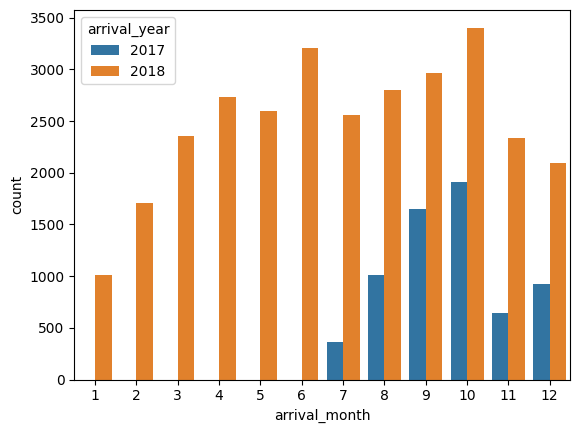

In [ ]:
# 월별 예약건수 연도별로 비교
sns.countplot(data=data, x="arrival_month", hue="arrival_year")

연도 빼면 안될 것 같은데...?
## 어린이 유무행 만들기

In [ ]:
data['is_there_children'] = data['no_of_children'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
data['is_there_children'].value_counts()

0    33577
1     2698
Name: is_there_children, dtype: int64

## 머무르는 인간 명수 만들기

In [ ]:
data['total_guests'] = data['no_of_children'] + data['no_of_adults']

<Axes: xlabel='total_guests', ylabel='count'>

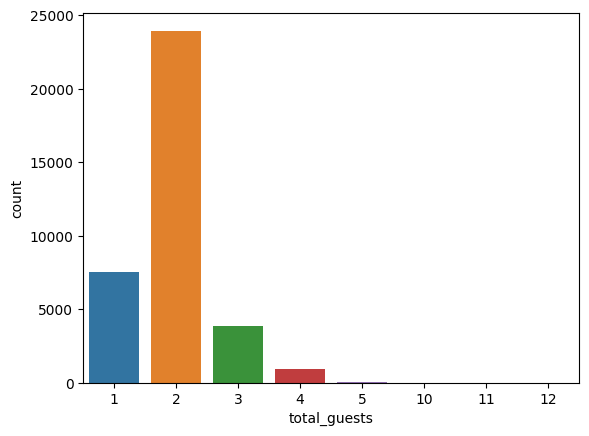

In [ ]:
sns.countplot(data=data, x="total_guests")

## 총 투숙일 변수생성

In [ ]:
data['total_day'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

<Axes: xlabel='total_day', ylabel='count'>

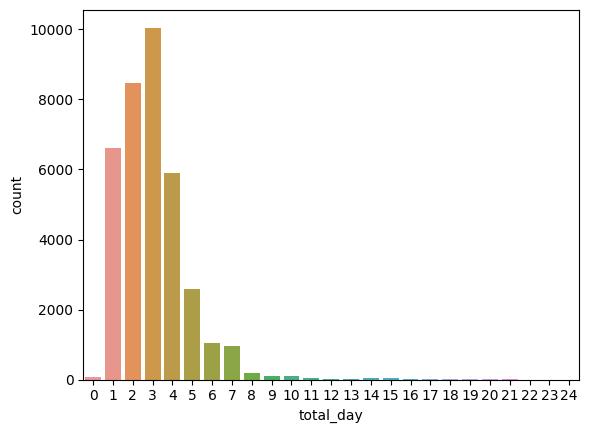

In [ ]:
sns.countplot(data=data, x="total_day")

## 성수기 비성수기 구분행 만들기

In [ ]:
data['holiday'] = data['arrival_month'].apply(lambda x: 0 if x in [3,4,5,6,9,10,11] else 1)

<Axes: xlabel='holiday', ylabel='count'>

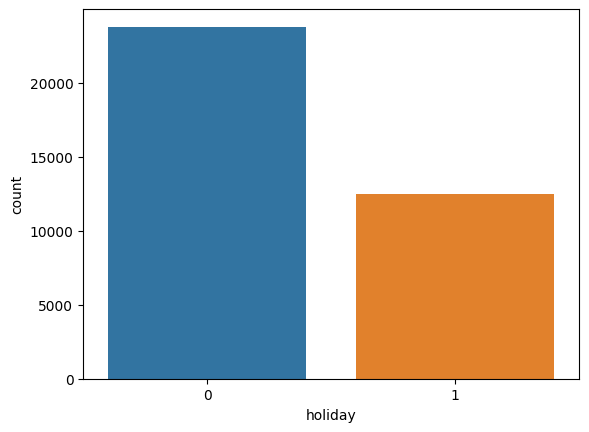

In [ ]:
sns.countplot(data=data, x="holiday")

## avg_price_per_room 이상치 확인하기
앞에서 보니까 대부분 300안쪽인 것 같아서 일단 100 안에서 끊어보기로 함

In [ ]:
bins = [0, 10,20,30,40,50,60,70,80,90,100]  # 구간을 나눌 기준값
labels = ['1', '2','3','4','5','6','7','8','9','10']  # 구간별 라벨
data['aaa'] = pd.cut(data['avg_price_per_room'], bins=bins, labels=labels)  # 구간별로 라벨링된 새로운 열 추가
result = data.groupby('aaa').size().reset_index(name='분포')  # 구간별로 그룹화하여 각 구간별 분포를 계산

print(result)

  aaa    분포
0   1    53
1   2    29
2   3     3
3   4    72
4   5   207
5   6   838
6   7  2812
7   8  4378
8   9  4961
9  10  4987


In [ ]:
data.drop('aaa', axis=1, inplace=True)

In [ ]:
print(data[data['avg_price_per_room']<10])

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
165               1               0                     2                  1   
209               1               0                     0                  0   
266               1               0                     0                  2   
...             ...             ...                   ...                ...   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   
36263             1               0                     2                  1   

       type_of_meal_plan  required_car_

In [ ]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date,holiday,is_there_children,total_guests,total_day
0,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00,0,0,2017-10-02,0,0,2,3
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0,2018-11-06,0,0,2,5
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1,2018-02-28,1,0,1,3
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1,2018-05-20,0,0,2,2
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1,2018-04-11,0,0,2,2


## no of previeous 둘이 관계

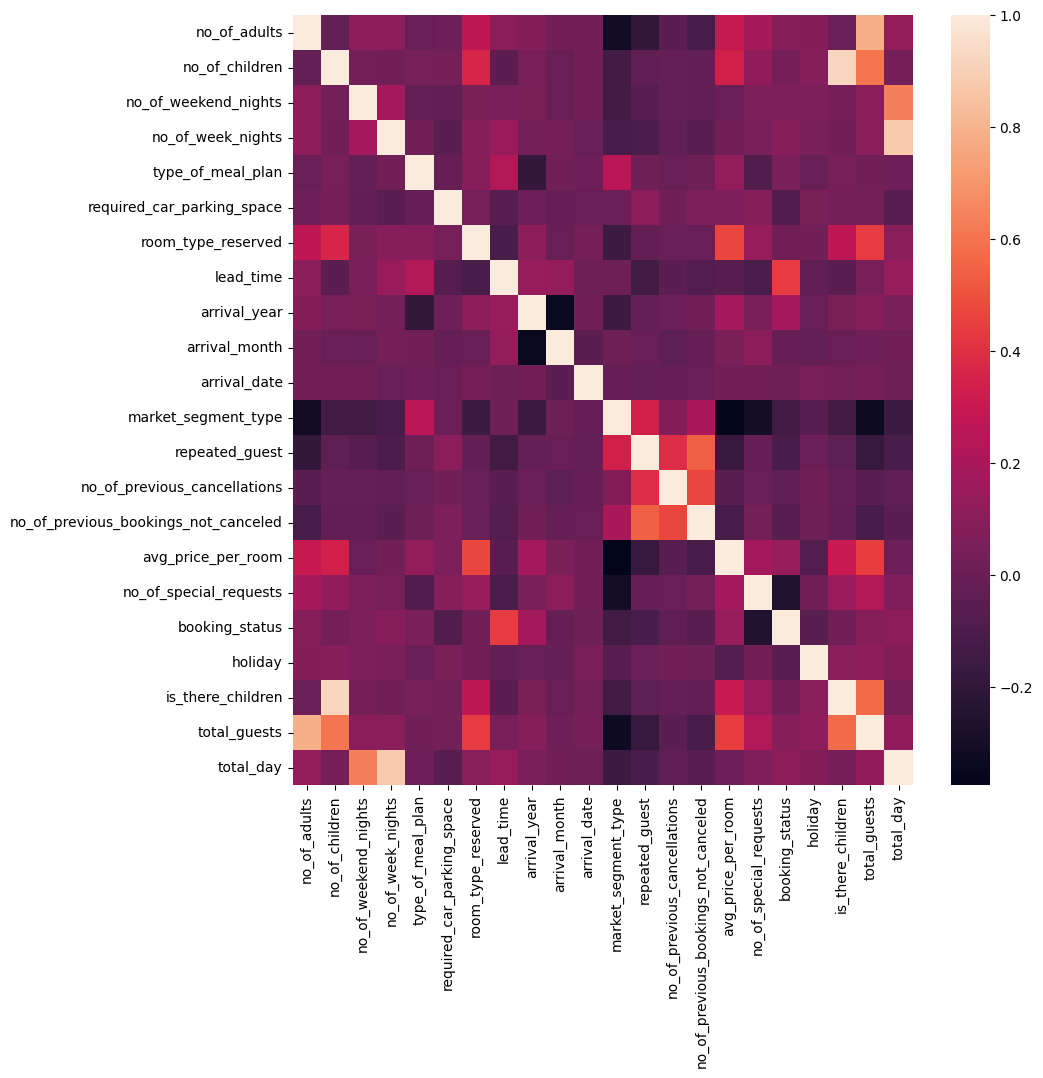

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())
plt.show()

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='no_of_previous_cancellations'>

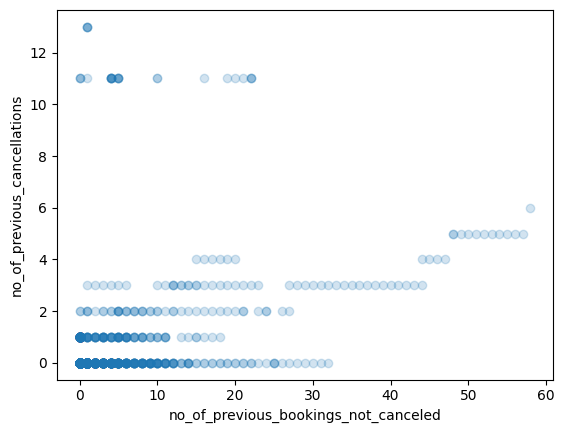

In [ ]:
sns.regplot(x="no_of_previous_bookings_not_canceled", y="no_of_previous_cancellations", data=data, fit_reg=False, scatter_kws = {'alpha':0.2})

In [ ]:
#heatmap상에서는 뭔가 상관관계가 있어보이긴 했는데
# scatterplot상에서는 애매하다.. 위에 있는 애들도 꽤 많아서 이상치처리하고 직선으로 잡기도 애매하고,
# 아래 쭉 깔린 애들도 많고...
# 무엇보다 둘다 적은 애들이 많아서 의미가 있나?
# corr()로 보면 상관계수는 0.4로 낮진 않은 편...

In [ ]:
data.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,holiday,is_there_children,total_guests,total_day
no_of_adults,1.000000,-0.019787,0.103316,0.105622,-0.004139,0.011429,0.270348,0.097287,0.076719,0.021841,0.026338,-0.314103,-0.192277,-0.047426,-0.119166,0.296886,0.189401,0.086920,0.078282,0.004515,0.785371,0.133803
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.042216,0.034244,0.364073,-0.047091,0.045983,-0.003076,0.025482,-0.130618,-0.036348,-0.016390,-0.021189,0.337728,0.124486,0.033078,0.089075,0.922407,0.603365,0.033644
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.018762,-0.031111,0.057368,0.046595,0.055357,-0.009894,0.027304,-0.129069,-0.067107,-0.020690,-0.026312,-0.004525,0.060593,0.061563,0.064840,0.033146,0.100658,0.629339
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,0.026888,-0.048784,0.094125,0.149650,0.032672,0.037376,-0.009305,-0.112952,-0.099764,-0.030080,-0.049344,0.022753,0.045994,0.092996,0.051542,0.024410,0.099352,0.877513
type_of_meal_plan,-0.004139,0.042216,-0.018762,0.026888,1.000000,-0.015161,0.093410,0.226712,-0.187699,0.017222,0.015952,0.254926,0.010001,-0.006799,0.006331,0.134703,-0.090276,0.049374,-0.008820,0.042446,0.022837,0.012095
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,-0.015161,1.000000,0.038778,-0.066445,0.015684,-0.015505,-0.000037,0.003723,0.110909,0.027106,0.063810,0.061304,0.087922,-0.086185,0.054445,0.032379,0.030318,-0.053704
room_type_reserved,0.270348,0.364073,0.057368,0.094125,0.093410,0.038778,1.000000,-0.107793,0.103369,-0.005967,0.032919,-0.156610,-0.025826,-0.007936,-0.008139,0.469899,0.145041,0.022986,0.017526,0.273308,0.441050,0.102322
lead_time,0.097287,-0.047091,0.046595,0.149650,0.226712,-0.066445,-0.107793,1.000000,0.143439,0.136814,0.006479,0.006933,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645,0.438538,-0.027124,-0.046073,0.048441,0.140934
arrival_year,0.076719,0.045983,0.055357,0.032672,-0.187699,0.015684,0.103369,0.143439,1.000000,-0.339689,0.018849,-0.150027,-0.018175,0.003919,0.026422,0.178605,0.053205,0.179529,-0.009884,0.059532,0.089663,0.052795
arrival_month,0.021841,-0.003076,-0.009894,0.037376,0.017222,-0.015505,-0.005967,0.136814,-0.339689,1.000000,-0.042780,0.006311,0.000341,-0.038615,-0.010718,0.054423,0.110552,-0.011233,-0.018335,-0.001849,0.015517,0.024703


## 3/27 회의 변동사항 추가
### 취소비율

In [ ]:
total_resv = data['no_of_previous_cancellations'] + data['no_of_previous_bookings_not_canceled'] 
data['p_cancel'] = data['no_of_previous_bookings_not_canceled'] / total_resv

data['p_cancel']= data['p_cancel'].fillna(0)

data


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date,holiday,is_there_children,total_guests,total_day,p_cancel
0,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00,0,0,2017-10-02,0,0,2,3,0.0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0,2018-11-06,0,0,2,5,0.0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1,2018-02-28,1,0,1,3,0.0
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1,2018-05-20,0,0,2,2,0.0
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1,2018-04-11,0,0,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,2018,8,3,1,0,0,0,167.80,1,0,2018-08-03,1,0,3,8,0.0
36271,2,0,1,3,1,0,1,228,2018,10,17,1,0,0,0,90.95,2,1,2018-10-17,0,0,2,4,0.0
36272,2,0,2,6,1,0,1,148,2018,7,1,1,0,0,0,98.39,2,0,2018-07-01,1,0,2,8,0.0
36273,2,0,0,3,0,0,1,63,2018,4,21,1,0,0,0,94.50,0,1,2018-04-21,0,0,2,3,0.0


### 평균 단가 0인애들에 대한 처리


In [ ]:
freehotel = data[data['avg_price_per_room']==0]
freehotel.drop('avg_price_per_room', axis=1, inplace=True)
freehotel.columns.tolist()


<ipython-input-66-7af40daf196f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freehotel.drop('avg_price_per_room', axis=1, inplace=True)


['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'no_of_special_requests',
 'booking_status',
 'date',
 'holiday',
 'is_there_children',
 'total_guests',
 'total_day',
 'p_cancel']

In [ ]:
freehotel.shape

(545, 23)

<Axes: >

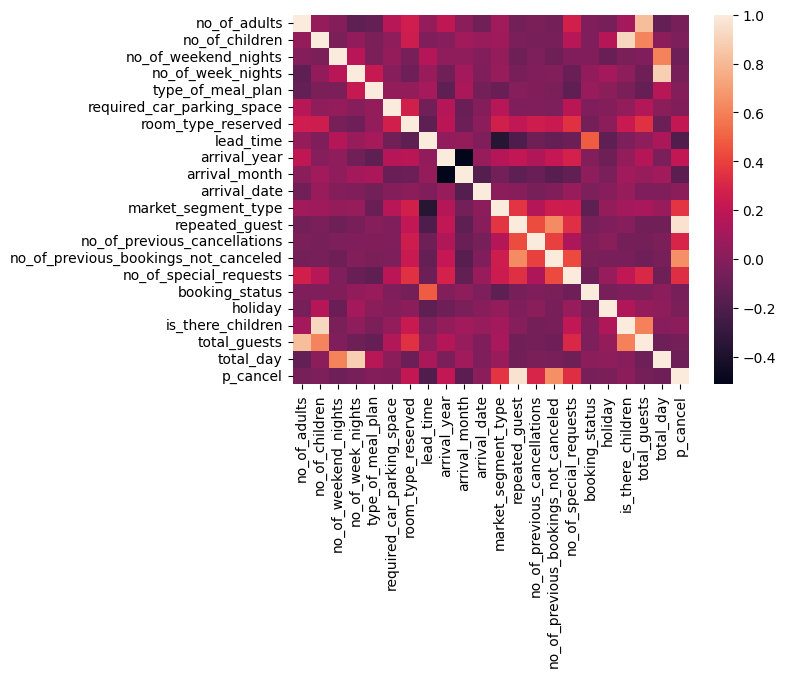

In [ ]:
sns.heatmap(freehotel.corr())

### 랜덤포레스트 피처중요도

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

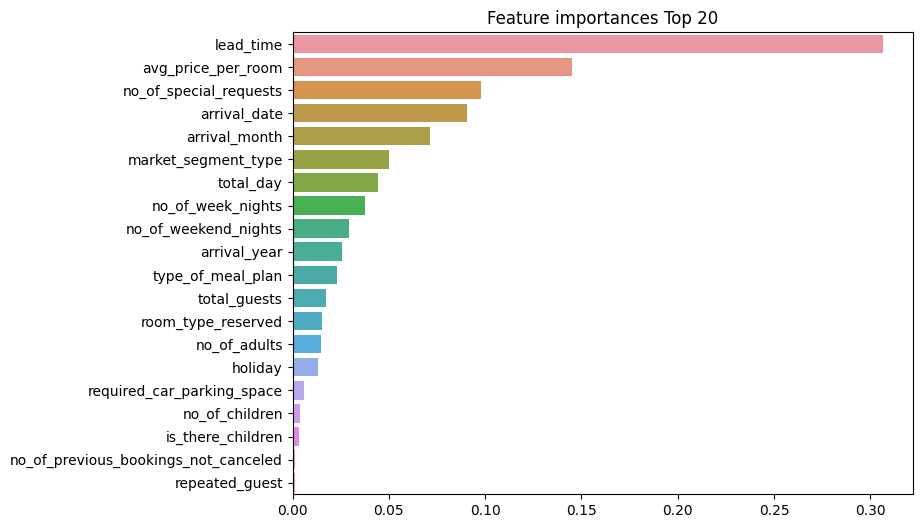

In [ ]:
importances_values = rfc.feature_importances_
importances = pd.Series(importances_values, index=x_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

### 개인적인 생각
- 평균 객실 단가에 미치는 요소가 크게 토탈게스트, 어른수 애들수이고 전체 예약여부에 많은 영향을 끼치는 변수가 피처분포도 상에서 리드타임을 고려하여 토탈게스트와 리드타임의 전체데이터 ,프리호텔(평균객실단가 0 인 애들 데이터)에서의 분포를 확인하였다.

- 둘 사이에서 물론 초반에 몰려있다는 경향성은 동일하며, 데이터 건수에서 차이가 발생하는 것일 수도 있으나 어떤 데이터에서는 치중되어 있고, 어던 데이터에서는 균등하게 분포되어 있는 것을 고려하여 두 데이터의 분포가 다른 것을 확인하고 대체할 수 없다는 생각이 들었음...

- 차라리 모델셀렉션을 건들여보는게 낫지 않나...?

<Axes: xlabel='market_segment_type', ylabel='Count'>

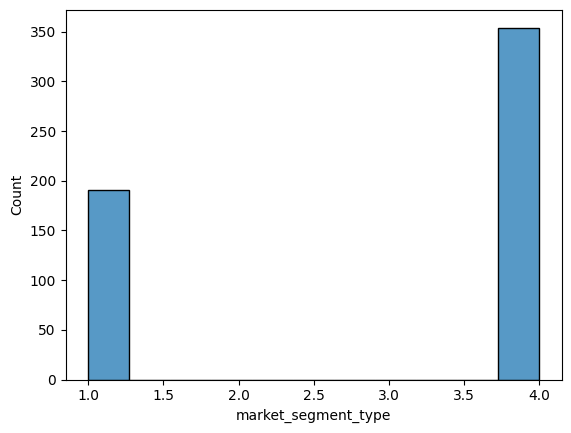

In [ ]:
sns.histplot(freehotel, x="market_segment_type")

<Axes: xlabel='room_type_reserved', ylabel='Count'>

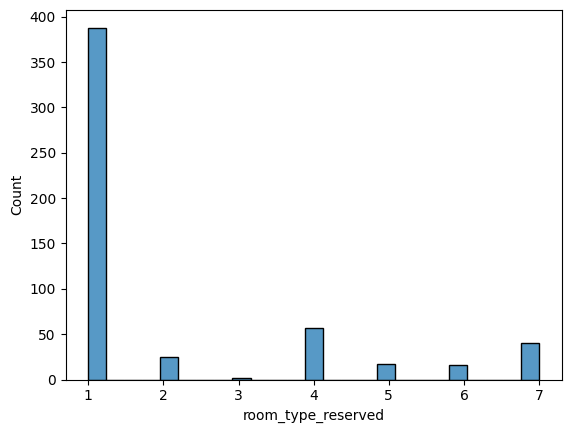

In [ ]:
sns.histplot(freehotel, x="room_type_reserved")

<Axes: xlabel='total_guests', ylabel='Count'>

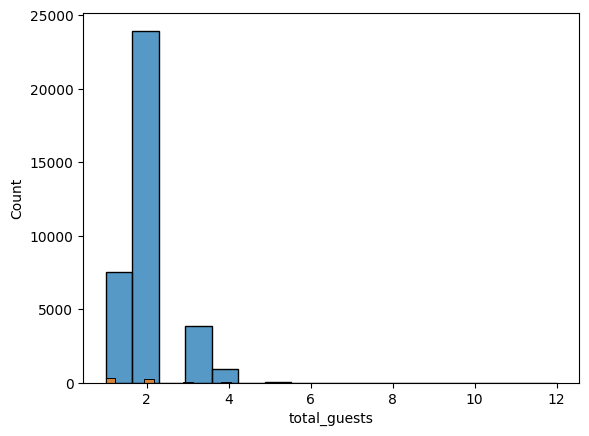

In [ ]:
sns.histplot(data, x="total_guests")


<Axes: xlabel='total_guests', ylabel='Count'>

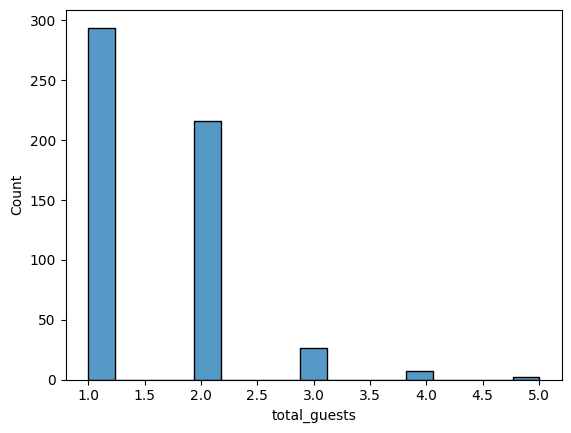

In [ ]:
sns.histplot(freehotel, x="total_guests")

<Axes: xlabel='lead_time', ylabel='Count'>

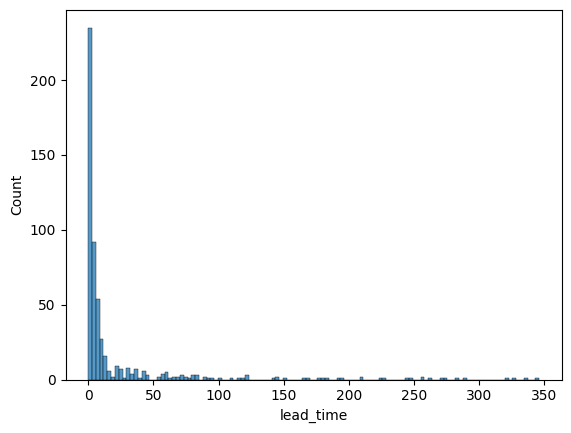

In [ ]:
sns.histplot(freehotel, x="lead_time")

<Axes: xlabel='lead_time', ylabel='Count'>

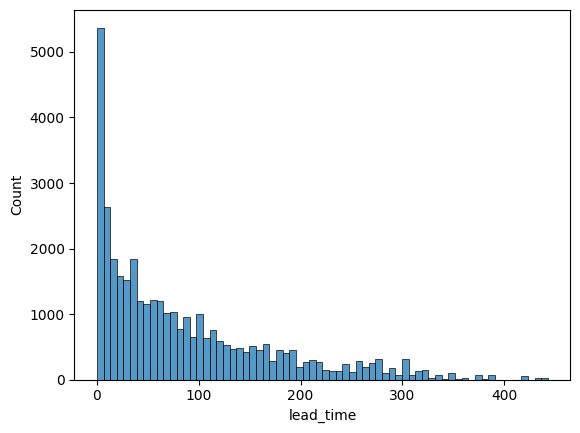

In [ ]:
sns.histplot(data, x="lead_time")

In [ ]:
freehotel

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status,date,holiday,is_there_children,total_guests,total_day,p_cancel
63,1,0,0,1,1,0,1,2,2017,9,10,4,0,0,0,1,0,2017-09-10,0,0,1,1,0.000000
145,1,0,0,2,1,0,1,13,2018,6,1,4,1,3,5,1,0,2018-06-01,0,0,1,2,0.625000
209,1,0,0,0,1,0,1,4,2018,2,27,4,0,0,0,1,0,2018-02-27,1,0,1,0,0.000000
266,1,0,0,2,1,0,1,1,2017,8,12,4,1,0,1,1,0,2017-08-12,1,0,1,2,1.000000
267,1,0,2,1,1,0,1,4,2017,8,23,4,0,0,0,1,0,2017-08-23,1,0,1,3,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,1,0,7,0,2018,6,7,4,1,4,17,1,0,2018-06-07,0,0,1,1,0.809524
36080,1,0,1,1,1,0,7,0,2018,3,21,4,1,3,15,1,0,2018-03-21,0,0,1,2,0.833333
36114,1,0,0,1,1,0,1,1,2018,3,2,1,0,0,0,0,0,2018-03-02,0,0,1,1,0.000000
36217,2,0,2,1,1,0,2,3,2017,8,9,1,0,0,0,2,0,2017-08-09,1,0,2,3,0.000000


In [ ]:
freehotel[freehotel['lead_time']<25]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status,date,holiday,is_there_children,total_guests,total_day,p_cancel
63,1,0,0,1,1,0,1,2,2017,9,10,4,0,0,0,1,0,2017-09-10,0,0,1,1,0.000000
145,1,0,0,2,1,0,1,13,2018,6,1,4,1,3,5,1,0,2018-06-01,0,0,1,2,0.625000
209,1,0,0,0,1,0,1,4,2018,2,27,4,0,0,0,1,0,2018-02-27,1,0,1,0,0.000000
266,1,0,0,2,1,0,1,1,2017,8,12,4,1,0,1,1,0,2017-08-12,1,0,1,2,1.000000
267,1,0,2,1,1,0,1,4,2017,8,23,4,0,0,0,1,0,2017-08-23,1,0,1,3,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,1,0,7,0,2018,6,7,4,1,4,17,1,0,2018-06-07,0,0,1,1,0.809524
36080,1,0,1,1,1,0,7,0,2018,3,21,4,1,3,15,1,0,2018-03-21,0,0,1,2,0.833333
36114,1,0,0,1,1,0,1,1,2018,3,2,1,0,0,0,0,0,2018-03-02,0,0,1,1,0.000000
36217,2,0,2,1,1,0,2,3,2017,8,9,1,0,0,0,2,0,2017-08-09,1,0,2,3,0.000000


In [ ]:
colname = ['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status',
 'date',
 'holiday',
 'is_there_children',
 'total_guests',
 'total_day',
 'p_cancel']

#model
## 최종 데이터 정제

In [ ]:
data.shape

(36275, 24)

In [ ]:
X = data.drop(['booking_status'], axis=1)
X = data.drop(['repeated_guest'], axis=1)
X = data.drop(['no_of_previous_bookings_not_canceled'], axis=1)
X = X.drop(['no_of_children'], axis=1)

In [ ]:
X = X.drop(['repeated_guest'], axis=1)

In [ ]:
X = X.drop(['no_of_previous_bookings_not_canceled'], axis=1)

In [ ]:
X = X.drop(['no_of_children'], axis=1)

In [ ]:
y = data['booking_status']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   no_of_adults                  36275 non-null  int64         
 1   no_of_weekend_nights          36275 non-null  int64         
 2   no_of_week_nights             36275 non-null  int64         
 3   type_of_meal_plan             36275 non-null  int64         
 4   required_car_parking_space    36275 non-null  int64         
 5   room_type_reserved            36275 non-null  int64         
 6   lead_time                     36275 non-null  int64         
 7   arrival_year                  36275 non-null  int64         
 8   arrival_month                 36275 non-null  int64         
 9   arrival_date                  36275 non-null  int64         
 10  market_segment_type           36275 non-null  int64         
 11  no_of_previous_cancellations

In [ ]:
#datetime은 처리 못한다고 난리나서 지워보기로 함
X =X.drop(['date'], axis=1)

In [ ]:
# 실수는 못한다고 또 에러나서 반올림해서 해보기로 함
X = X.round(0).astype(int)
X.dtypes

no_of_adults                    int64
no_of_weekend_nights            int64
no_of_week_nights               int64
type_of_meal_plan               int64
required_car_parking_space      int64
room_type_reserved              int64
lead_time                       int64
arrival_year                    int64
arrival_month                   int64
arrival_date                    int64
market_segment_type             int64
no_of_previous_cancellations    int64
avg_price_per_room              int64
no_of_special_requests          int64
holiday                         int64
is_there_children               int64
total_guests                    int64
total_day                       int64
p_cancel                        int64
dtype: object

## train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1886)

## DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


dtc = DecisionTreeClassifier()

# Fit the model
dtc.fit(x_train, y_train)

# Predict the x_test
predict = dtc.predict(x_test)

print('The accuracy of the Decision Tree is',metrics.accuracy_score(predict,y_test))

The accuracy of the Decision Tree is 0.868878066709547


### DTC with gini - 더 떨어짐

In [ ]:
DTC_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# Fit the model
DTC_gini.fit(x_train, y_train)
#predict
y_pred_gini = DTC_gini.predict(x_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7911


In [ ]:
y_pred_train_gini = DTC_gini.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7838


In [ ]:
# Print the scores on training and test set

print('Training set score: {:.4f}'.format(DTC_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(DTC_gini.score(x_test, y_test)))

Training set score: 0.7838
Test set score: 0.7911


### DTC with entropy
망했네..


In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
DTC_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Fit the model
DTC_en.fit(x_train, y_train)

y_pred_en = DTC_en.predict(x_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7911


In [ ]:
y_pred_train_en = DTC_en.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7838


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(DTC_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(DTC_en.score(x_test, y_test)))

Training set score: 0.7838
Test set score: 0.7911


## RandomForest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 1886)

# Fit the model
rfc.fit(x_train, y_train)

# Predict the model
predict = rfc.predict(x_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.9050813194891114


## ETC 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=5, random_state=1886)
# Fit the model
etc.fit(x_train, y_train)

# Predict the model
predict = etc.predict(x_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.8720940917026555


## 스태킹 모델

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import warnings
rf_fin_clf = RandomForestClassifier(n_estimators=100, random_state=1886)
#개별 모델로 K 교차 검증 수행하여 최종 메타 모델의 학습 데이터와 테스트 데이터 생성
def get_stacking_base_datasets(model,X_train_n, y_train_n, X_test_n, n_folds ):
    kf=KFold(n_splits=n_folds, shuffle=False )
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred=np.zeros((X_train_n.shape[0],1))
    test_pred=np.zeros((X_test_n.shape[0],n_folds))
    
    for folder_counter,(train_index,valid_index) in enumerate(kf.split(X_train_n)):
        X_tr=X_train_n[train_index]
        y_tr=y_train_n[train_index]
        X_vl=X_train_n[valid_index]
        
        model.fit(X_tr,y_tr)
        #개별 모델의 예측을 통해 생성된 학습 데이터 (메타 모델의 학습 데이터로 쓰임)
        train_fold_pred[valid_index,:]=model.predict(X_vl).reshape(-1,1)
        #개별 모델의 예측을 통해 생성된 테스트 데이터 (메타 모델의 테스트 데이터로 쓰임)
        test_pred[:,folder_counter]=model.predict(X_test_n)
    
    test_pred_mean=np.mean(test_pred,axis=1).reshape(-1,1)
    return train_fold_pred,test_pred_mean


dtc_train,dtc_test=get_stacking_base_datasets(dtc,x_train,y_train,x_test,7)
etc_train,etc_test=get_stacking_base_datasets(etc,x_train,y_train,x_test,7)

# 개별 모델의 결과들을 옆으로 쌓기 (스태킹)
Stack_final_X_train=np.concatenate((dtc_train,etc_train),axis=1)
Stack_final_X_test=np.concatenate((dtc_test,etc_test),axis=1)

# 메타 모델을 학습시키고 예측하여 원본 테스트 레이블과 비교하여 정확도 평가
rfc.fit(Stack_final_X_train,y_train)
stack_final_pred=rf_fin_clf.predict(Stack_final_X_test)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test,stack_final_pred)))

KeyError: ignored